In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
diabetes = pd.read_csv('../Data/diabetes.csv', usecols = ['Glucose', 'Insulin', 'DiabetesPedigreeFunction'],sep=',')
diabetes.head()
print(diabetes.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes[['Glucose', 'Insulin', 'DiabetesPedigreeFunction']], diabetes[['DiabetesPedigreeFunction']], test_size=0.1, random_state=0)

from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_test, axis=0)

print('X_train_norm',len(X_train_norm))

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans1.fit(X_train[['Glucose']])
labels1=kmeans1.predict(X_train[['Glucose']])

kmeans2 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans2.fit(X_train[['Insulin']])
labels2=kmeans2.predict(X_train[['Insulin']])

dflabels1=pd.DataFrame(labels1, columns=['class1'])
dflabels2=pd.DataFrame(labels2, columns=['class2'])

(768, 3)
X_train_norm 691


<Axes: ylabel='DiabetesPedigreeFunction'>

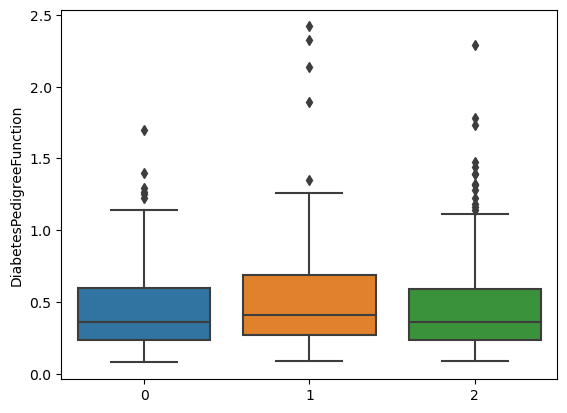

In [2]:
import seaborn as sns
sns.boxplot(x = labels1, y = y_train['DiabetesPedigreeFunction'])

<Axes: ylabel='DiabetesPedigreeFunction'>

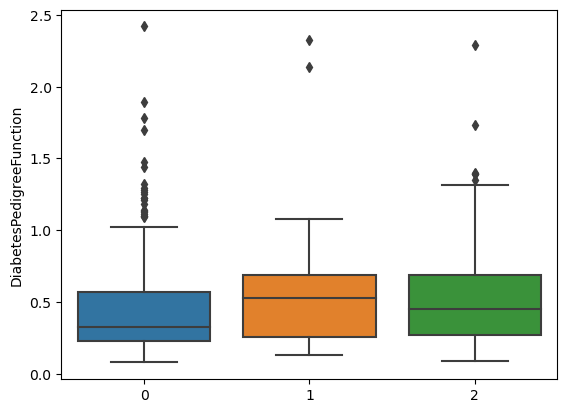

In [3]:
sns.boxplot(x = labels2, y = y_train['DiabetesPedigreeFunction'])

In [4]:
#X_train=pd.concat([train_sp, X_train.reset_index(drop=True, inplace=True)], axis=1)
df=pd.concat([X_train.reset_index(), dflabels1.reset_index(), dflabels2], axis=1)
df
#sns.scatterplot(data = df, x = 'class', y='Price')
#df[['Price','class']]
#sns.boxplot(x = df['class'], y = df['Price'])

,index,Glucose,Insulin,DiabetesPedigreeFunction,index,class1,class2
0,499,154,193,0.839,0,1,2
1,720,83,0,0.317,1,0,0
2,556,97,0,0.218,2,0,0
3,583,100,0,0.190,3,0,0
4,150,136,204,0.399,4,2,2
...,...,...,...,...,...,...,...
686,763,101,180,0.171,686,0,2
687,192,159,0,0.383,687,1,0
688,629,94,0,0.148,688,0,0
689,559,85,0,0.300,689,0,0


In [5]:
k=max(df['class1'])+1
print('Glucose')
for i in range(k):
    dfi=df['Glucose'][df['class1']==i]
    print(f'{i+1},  {dfi.mean():.0f}')
print('Insulin')
for i in range(k):
    dfi=df['Insulin'][df['class2']==i]
    print(f'{i+1},  {dfi.mean():.0f}')

Glucose
1,  93
2,  170
3,  127
Insulin
1,  13
2,  439
3,  155


In [6]:
import numpy as np
#X_train
#df['class']
k=max(df['class1'])+1
print('Classes ij')
dfij_sorted=np.zeros(k*k)
t=0
for i in range(k):
    for j in range(k):
        dfij=df['DiabetesPedigreeFunction'][(df['class1']==i) & (df['class2']==j)]
        print(f'{i+1}{j+1},  {dfij.mean():.3f}')
        dfij_sorted[t]=dfij.mean()
        t+=1
dfij_sorted.sort()
print("dfij_sorted")
print([f'{dfij_sorted[t]:.3f}' for t in range(k*k)])

Classes ij
11,  0.423
12,  0.159
13,  0.496
21,  0.481
22,  0.666
23,  0.537
31,  0.421
32,  0.462
33,  0.520
dfij_sorted
['0.159', '0.421', '0.423', '0.462', '0.481', '0.496', '0.520', '0.537', '0.666']


In [7]:
max(df['class1'])

2